In [1]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
df = pd.DataFrame()
for root, dirs, files in os.walk('/Users/longzheng/SlayTheSpire.app/Contents/Resources/runs'):
    for name in files:
        if name.endswith(".run"):
            f = open(root + '/' + name)
            temp_run = f.readline()
            f.close()
            temp_dict = json.loads(temp_run)
            temp_dataFrame = pd.DataFrame([temp_dict])
            df = pd.concat([df, temp_dataFrame], ignore_index= True)

In [3]:
df.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,...,relics_obtained,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed
0,"[113, 130, 12, 12, 26, 26, 53, 53, 53, 69, 92,...",16,451,[Clash],216,f54f60e6-8ba3-4c7a-9e52-0ad9a61fe447,20220718170453,True,"[{'data': 'Inflame', 'floor': 6, 'key': 'SMITH...",TEN_PERCENT_HP_LOSS,...,"[{'floor': 7, 'key': 'Singing Bowl'}, {'floor'...","[{'damage_healed': 0, 'gold_gain': 0, 'player_...",False,[],[3],False,"[1, 10, 11]",Hexaghost,20,NaN
1,"[20, 70, 84, 95, 112, 112, 125, 125, 172, 207,...",23,755,[Strike_R],410,71eca2be-bde1-4a59-b699-b2256511217d,20220423073516,True,"[{'data': 'Uppercut', 'floor': 6, 'key': 'SMIT...",NO_GOLD,...,"[{'floor': 9, 'key': 'Happy Flower'}, {'floor'...","[{'damage_healed': 0, 'gold_gain': 50, 'player...",False,"[{'not_picked': ['Empty Cage', 'Sozu'], 'picke...",[20],False,"[3, 4, 16, 21]",Book of Stabbing,20,NaN
2,"[369, 18, 28, 28, 43, 76, 76, 101, 101, 101, 1...",40,1499,"[Strike_R, Normality]",956,a4b5a97b-d652-4bbc-bba5-d491ca379521,20220724223004,True,"[{'data': 'Bash', 'floor': 7.0, 'key': 'SMITH'...",TEN_PERCENT_HP_LOSS,...,"[{'floor': 6.0, 'key': 'WingedGreaves'}, {'flo...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Runic Pyramid', 'Mark of Pai...","[19, 38]",False,"[5, 6, 8, 11, 14, 18, 22, 23, 28, 30, 31, 37]",Giant Head,20,0.0
3,"[112, 112, 112, 123, 141, 168, 168, 224, 249, ...",16,571,[],286,85c394db-86bb-403b-b135-9770c38e89f5,20220419233026,True,"[{'floor': 7.0, 'key': 'REST'}, {'floor': 12.0...",NONE,...,"[{'floor': 6.0, 'key': 'Strawberry'}, {'floor'...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,[],[],False,"[5, 6, 13]",The Guardian,20,0.0
4,"[113, 129, 54, 54, 70, 70, 100, 100, 100, 100,...",42,1955,"[Strike_R, Strike_R, Strike_R]",896,96181a75-e65f-40fa-8b82-a27161a29340,20230104214148,True,"[{'data': 'Blood for Blood', 'floor': 6.0, 'ke...",NONE,...,"[{'floor': 4.0, 'key': 'Shuriken'}, {'floor': ...","[{'cards_removed': ['Strike_R'], 'damage_heale...",False,"[{'not_picked': ['Ectoplasm', 'Calling Bell'],...","[14, 31, 39]",False,"[1, 11, 12, 16, 18, 21, 24, 25, 28, 29, 33, 35...",Nemesis,20,0.0


In [4]:
# Filter for ascension 20 
asc_20_mask = df['ascension_level'] == 20
asc_20_mask
df = df[asc_20_mask]

In [5]:
gold_per_floor_winning = []
ironclad_gold_per_floor_winning = []
silent_gold_per_floor_winning = []
defect_gold_per_floor_winning = []
watcher_gold_per_floor_winning = []

In [6]:
for i in range(df.shape[0]): 
    floor_reached_index = df.columns.get_loc('floor_reached')
    if df.iloc[i, floor_reached_index] == 57: 
        gold_per_floor_col_index = df.columns.get_loc('gold_per_floor')
        tmp_list = df.iloc[i,gold_per_floor_col_index]
        gold_per_floor_winning.append(tmp_list)
        char_chosen_col_index = df.columns.get_loc('character_chosen')
        char_chosen = df.iloc[i, char_chosen_col_index]
        if char_chosen == 'IRONCLAD':
            ironclad_gold_per_floor_winning.append(tmp_list)
        elif char_chosen == 'THE_SILENT': 
            silent_gold_per_floor_winning.append(tmp_list)
        elif char_chosen == 'DEFECT':
            defect_gold_per_floor_winning.append(tmp_list)
        else : 
            watcher_gold_per_floor_winning.append(tmp_list)

In [7]:
# The * operator 'unpacks' a list, that is to say that it passes all elements of the iterable into the function
# in this case all sub-lists, from list_of_lists, are passed as arguments in the zip function
# This results in a zip object where every ith element of the zip object contains the ith element of 
# each of the sub-list 
def average_gold_per_floor(list_of_lists): 
    average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]
    return average

def max_gold_per_floor(list_of_lists): 
    max_list = [max(sub_list) for sub_list in zip(*list_of_lists)]
    return max_list

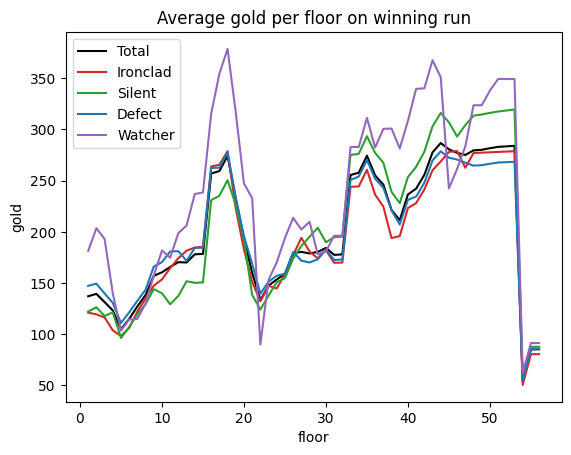

In [8]:
total_average_gold_per_floor_winning = average_gold_per_floor(gold_per_floor_winning)
average_ironclad_gold_per_floor_winning = average_gold_per_floor(ironclad_gold_per_floor_winning)
average_silent_gold_per_floor_winning = average_gold_per_floor(silent_gold_per_floor_winning)
average_defect_gold_per_floor_winning = average_gold_per_floor(defect_gold_per_floor_winning)
average_watcher_gold_per_floor_winning = average_gold_per_floor(watcher_gold_per_floor_winning)


floor_list_index = [i for i in range(1,57)]
plt.plot(floor_list_index, total_average_gold_per_floor_winning, 'k', label = 'Total')
plt.plot(floor_list_index, average_ironclad_gold_per_floor_winning, 'tab:red', label = 'Ironclad')
plt.plot(floor_list_index, average_silent_gold_per_floor_winning, 'tab:green', label = 'Silent')
plt.plot(floor_list_index, average_defect_gold_per_floor_winning, 'tab:blue', label = 'Defect')
plt.plot(floor_list_index, average_watcher_gold_per_floor_winning, 'tab:purple', label = 'Watcher')
plt.legend()
plt.ylabel('gold')
plt.xlabel('floor')
plt.title('Average gold per floor on winning run')
plt.show()

# add legend, axes labels, title later

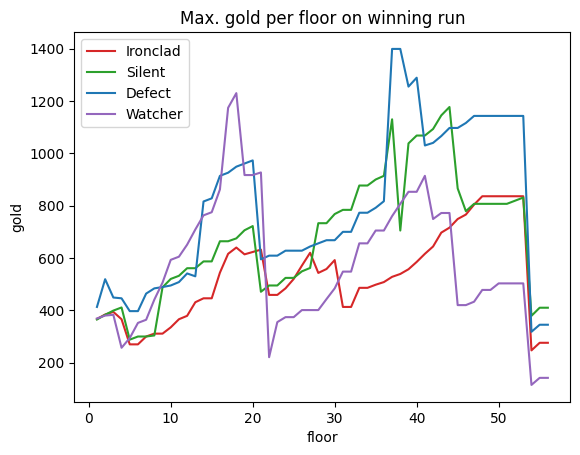

In [9]:
max_ironclad_gold_per_floor_winning = max_gold_per_floor(ironclad_gold_per_floor_winning)
max_silent_gold_per_floor_winning = max_gold_per_floor(silent_gold_per_floor_winning)
max_defect_gold_per_floor_winning = max_gold_per_floor(defect_gold_per_floor_winning)
max_watcher_gold_per_floor_winning = max_gold_per_floor(watcher_gold_per_floor_winning)

plt.plot(floor_list_index, max_ironclad_gold_per_floor_winning, 'tab:red', label = 'Ironclad')
plt.plot(floor_list_index, max_silent_gold_per_floor_winning, 'tab:green', label = 'Silent')
plt.plot(floor_list_index, max_defect_gold_per_floor_winning, 'tab:blue', label = 'Defect')
plt.plot(floor_list_index, max_watcher_gold_per_floor_winning, 'tab:purple', label = 'Watcher')
plt.legend()
plt.ylabel('gold')
plt.xlabel('floor')
plt.title('Max. gold per floor on winning run')
plt.show()
# add legend, axes labels, title later
# The graph shouldn't be a line, scatter plot??? or the graphs with points joined by lines. 
# Don't know what they are called

In [10]:
# make all the lists in the gold_per_floor column of length 56, 
# the max no. of floors. Enable calculation of average gold per floor
def to_max_floor_length(df): 
    max_floor = 56
    to_max_floor = lambda x: x + [0 for i in range(max_floor - len(x))]
    df['gold_per_floor'] = df['gold_per_floor'].apply(to_max_floor)

to_max_floor_length(df)

In [11]:
total_gold_per_floor = []
ironclad_gold_per_floor = []
silent_gold_per_floor = []
defect_gold_per_floor = []
watcher_gold_per_floor = []

In [12]:
# get average gold per floor for all runs
for i in range(df.shape[0]): 
    gold_per_floor_col_index = df.columns.get_loc('gold_per_floor')
    tmp_list = df.iloc[i,gold_per_floor_col_index]
    total_gold_per_floor.append(tmp_list)
    char_chosen_col_index = df.columns.get_loc('character_chosen')
    char_chosen = df.iloc[i, char_chosen_col_index]
    if char_chosen == 'IRONCLAD':
        ironclad_gold_per_floor.append(tmp_list)
    elif char_chosen == 'THE_SILENT': 
        silent_gold_per_floor.append(tmp_list)
    elif char_chosen == 'DEFECT':
        defect_gold_per_floor.append(tmp_list)
    else : 
        watcher_gold_per_floor.append(tmp_list)

In [13]:
total_average_gold_per_floor = average_gold_per_floor(total_gold_per_floor)
average_ironclad_gold_per_floor = average_gold_per_floor(ironclad_gold_per_floor)
average_silent_gold_per_floor = average_gold_per_floor(silent_gold_per_floor)
average_defect_gold_per_floor = average_gold_per_floor(defect_gold_per_floor)
average_watcher_gold_per_floor = average_gold_per_floor(watcher_gold_per_floor)

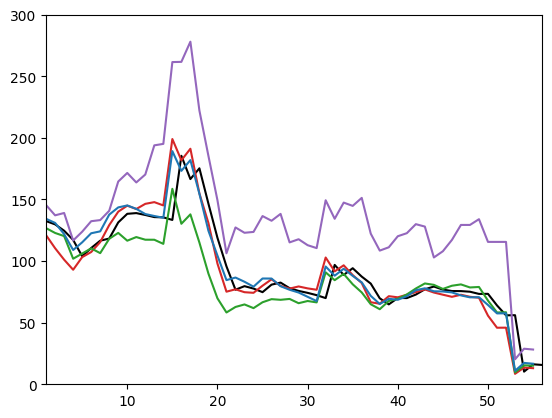

In [14]:
plt.plot(floor_list_index, total_average_gold_per_floor, 'k'
        , average_ironclad_gold_per_floor, 'tab:red'
        , average_silent_gold_per_floor, 'tab:green'
        , average_defect_gold_per_floor, 'tab:blue'
        , average_watcher_gold_per_floor, 'tab:purple')
plt.axis([1,56,0,300])
plt.show()
# add legend, axes labels, title later

In [15]:
neow_bonus_df = df[['neow_cost', 'neow_bonus', 'floor_reached']].copy()
neow_bonus_freq = neow_bonus_df.groupby(['neow_cost', 'neow_bonus'], as_index = False).count()
neow_bonus_freq.rename(columns = {'floor_reached': 'frequency'}, inplace = True)
neow_bonus_freq.head()

,neow_cost,neow_bonus,frequency
0,,,6
1,CURSE,ONE_RARE_RELIC,16
2,CURSE,RANDOM_COLORLESS_2,18
3,CURSE,THREE_RARE_CARDS,19
4,CURSE,TRANSFORM_TWO_CARDS,37


In [16]:
killed_heart = neow_bonus_df['floor_reached'] == 57
neow_bonus_killed_heart_df = neow_bonus_df[killed_heart]
neow_bonus_killed_heart_freq = neow_bonus_killed_heart_df.groupby(['neow_cost', 'neow_bonus'],
                               as_index=False).count()
neow_bonus_killed_heart_freq.rename(columns = {'floor_reached': 'win_frequency'}, inplace = True)
neow_bonus_killed_heart_freq.head()

,neow_cost,neow_bonus,win_frequency
0,CURSE,ONE_RARE_RELIC,4
1,CURSE,RANDOM_COLORLESS_2,2
2,CURSE,THREE_RARE_CARDS,2
3,CURSE,TRANSFORM_TWO_CARDS,3
4,CURSE,TWO_FIFTY_GOLD,12


In [17]:
## NEOW BONUS AND COST WIN RATES
neow_bonus_winrate = pd.merge(neow_bonus_freq, neow_bonus_killed_heart_freq, how = 'left')
neow_bonus_winrate['win_rate'] = neow_bonus_winrate['win_frequency']/neow_bonus_winrate['frequency'] * 100
neow_bonus_winrate.sort_values(by ='win_rate', ascending = False)

,neow_cost,neow_bonus,frequency,win_frequency,win_rate
25,PERCENT_DAMAGE,REMOVE_TWO,6,2.0,33.333333
11,NONE,REMOVE_CARD,13,4.0,30.769231
22,NO_GOLD,TRANSFORM_TWO_CARDS,49,14.0,28.571429
18,NO_GOLD,ONE_RARE_RELIC,58,16.0,27.586207
31,TEN_PERCENT_HP_LOSS,REMOVE_TWO,34,9.0,26.470588
34,TEN_PERCENT_HP_LOSS,TWO_FIFTY_GOLD,62,16.0,25.806452
1,CURSE,ONE_RARE_RELIC,16,4.0,25.000000
26,PERCENT_DAMAGE,THREE_RARE_CARDS,17,4.0,23.529412
28,PERCENT_DAMAGE,TWO_FIFTY_GOLD,52,11.0,21.153846
5,CURSE,TWO_FIFTY_GOLD,58,12.0,20.689655


In [18]:
## INSTANT LEAVE NEOW BONUSES
zero_floors = neow_bonus_df['floor_reached'] == 0
zero_floors_df = neow_bonus_df[zero_floors]
zero_floors_df = zero_floors_df.groupby(['neow_cost', 'neow_bonus'], as_index = False).count()
zero_floors_df = zero_floors_df.rename(columns= {'floor_reached' : 'frequency'})
zero_floors_df.sort_values(by = 'frequency', ascending = False)

,neow_cost,neow_bonus,frequency
3,NONE,BOSS_RELIC,18
7,NO_GOLD,RANDOM_COLORLESS_2,11
10,PERCENT_DAMAGE,RANDOM_COLORLESS_2,10
12,TEN_PERCENT_HP_LOSS,RANDOM_COLORLESS_2,9
0,,,6
1,CURSE,RANDOM_COLORLESS_2,4
11,PERCENT_DAMAGE,THREE_RARE_CARDS,4
5,NONE,ONE_RANDOM_RARE_CARD,2
8,NO_GOLD,TRANSFORM_TWO_CARDS,2
2,CURSE,THREE_RARE_CARDS,1


In [19]:
## WIN RATES BY NEOW BONUS
neow_bonus_total = neow_bonus_df.groupby(['neow_bonus'], as_index = False).count()
neow_bonus_total.drop(['floor_reached'], axis = 1, inplace = True)
neow_bonus_total.rename(columns = {'neow_cost' : 'frequency'}, inplace = True)
neow_bonus_killed_heart = neow_bonus_killed_heart_df.groupby(['neow_bonus'], as_index = False).count()
neow_bonus_killed_heart.drop(['floor_reached'], axis = 1, inplace = True)
neow_bonus_killed_heart.rename(columns = {'neow_cost' : 'win_frequency'}, inplace = True)
neow_bonus_merge = pd.merge(neow_bonus_total, neow_bonus_killed_heart, how = 'left')
neow_bonus_merge['win_rate'] = neow_bonus_merge['win_frequency']/ neow_bonus_merge['frequency'] * 100
neow_bonus_merge.sort_values(by = 'win_rate', ascending = False)

,neow_bonus,frequency,win_frequency,win_rate
8,REMOVE_CARD,13,4.0,30.769231
17,TWO_FIFTY_GOLD,172,39.0,22.674419
4,ONE_RARE_RELIC,146,31.0,21.232877
9,REMOVE_TWO,69,13.0,18.840580
7,RANDOM_COMMON_RELIC,86,16.0,18.604651
12,THREE_ENEMY_KILL,455,77.0,16.923077
16,TRANSFORM_TWO_CARDS,165,27.0,16.363636
6,RANDOM_COLORLESS_2,124,20.0,16.129032
1,BOSS_RELIC,204,32.0,15.686275
18,UPGRADE_CARD,34,5.0,14.705882


In [20]:
## WIN RATES BY NEOW COST
neow_cost_total = neow_bonus_df.groupby(['neow_cost'], as_index = False).count()
neow_cost_total.drop(['floor_reached'], axis = 1, inplace = True)
neow_cost_total.rename(columns = {'neow_bonus' : 'frequency'}, inplace = True)
neow_cost_killed_heart = neow_bonus_killed_heart_df.groupby(['neow_cost'], as_index = False).count()
neow_cost_killed_heart.drop(['floor_reached'], axis = 1, inplace = True)
neow_cost_killed_heart.rename(columns = {'neow_bonus' : 'win_frequency'}, inplace = True)
neow_cost_merge = pd.merge(neow_cost_total, neow_cost_killed_heart, how = 'left')
neow_cost_merge['win_rate'] = neow_cost_merge['win_frequency']/ neow_cost_merge['frequency'] * 100
neow_cost_merge.sort_values(by = 'win_rate', ascending = False)

,neow_cost,frequency,win_frequency,win_rate
4,PERCENT_DAMAGE,139,27.0,19.424460
3,NO_GOLD,221,42.0,19.004525
5,TEN_PERCENT_HP_LOSS,299,54.0,18.060201
1,CURSE,148,23.0,15.540541
2,NONE,1255,180.0,14.342629
0,,6,NaN,NaN


In [21]:
def count_frequency(some_dict, some_list): 
    for item in some_list: 
        if(item in some_dict): 
            some_dict[item] += 1
        else: 
            some_dict[item] = 1

In [22]:
relics_df = df[['relics', 'floor_reached', 'character_chosen']].copy()
heart_kills = relics_df['floor_reached'] == 57
relics_heart_kills_df = relics_df[heart_kills]
relics_heart_kills_df
win_relics_freq = {}
for i in range(relics_heart_kills_df.shape[0]): 
    count_frequency(win_relics_freq, relics_heart_kills_df.iloc[i,0])
total_relic_freq = {} 
for i in range(relics_df.shape[0]): 
    count_frequency(total_relic_freq, relics_df.iloc[i,0])
total_relics_df = pd.DataFrame.from_dict(total_relic_freq, orient = 'index', columns = ['frequency'])
winning_relics_df = pd.DataFrame.from_dict(win_relics_freq, orient = 'index', columns = ['win_frequency'])
relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
relics_merge_df.sort_values(by = 'win_rate', ascending = False, inplace = True)
relics_merge_df

,frequency,win_frequency,win_rate
Cauldron,1,1.0,100.000000
Frozen Eye,5,4.0,80.000000
Spirit Poop,4,3.0,75.000000
Yang,3,2.0,66.666667
TheAbacus,50,32.0,64.000000
...,...,...,...
Tiny House,31,4.0,12.903226
Golden Idol,269,31.0,11.524164
PrismaticShard,3,NaN,NaN
Black Blood,4,NaN,NaN


In [23]:
# Inserts a space between a lower case letter and an upper case letter in a given string
def space_between_words(some_str, index): 
    for i in range(len(some_str) - 1):
        if some_str[i].islower() and some_str[i+1].isupper(): 
            new_string = some_str[0:i+1] + ' ' + some_str[i+1:]
            return space_between_words(new_string, i + 2)
    return some_str

In [24]:
relic_list = relics_merge_df.index.tolist()
relic_list_corrections = {'Toxic Egg 2' : 'Toxic Egg', 
                          'Yang' : 'Duality'}
for idx, item in enumerate(relic_list): 
    relic_list[idx] = space_between_words(relic_list[idx],0)
relic_list

['Cauldron',
 'Frozen Eye',
 'Spirit Poop',
 'Yang',
 'The Abacus',
 'Damaru',
 'Orange Pellets',
 'Lizard Tail',
 'Paper Crane',
 'Old Coin',
 'Mango',
 'Tough Bandages',
 'Dead Branch',
 'Fossilized Helix',
 'Runic Capacitor',
 'Gambling Chip',
 'Snecko Eye',
 'Clockwork Souvenir',
 'Busted Crown',
 'Dollys Mirror',
 'Bottled Tornado',
 'Pocketwatch',
 'Bottled Lightning',
 'Incense Burner',
 'Mummified Hand',
 'Ginger',
 'Mark of Pain',
 'Ice Cream',
 'Data Disk',
 'Medical Kit',
 'Eternal Feather',
 'Art of War',
 'Ink Bottle',
 'Cables',
 'Bird Faced Urn',
 'Paper Frog',
 'Membership Card',
 "Nilry's Codex",
 'Oddly Smooth Stone',
 'Toxic Egg 2',
 'Captains Wheel',
 'Red Skull',
 'Pantograph',
 'Orrery',
 'Centennial Puzzle',
 'Anchor',
 'Necronomicon',
 'Bag of Preparation',
 'Coffee Dripper',
 'Runic Pyramid',
 'Lantern',
 'Ssserpent Head',
 'Calling Bell',
 'Turnip',
 "Pandora's Box",
 'Mercury Hourglass',
 'Prayer Wheel',
 'Pure Water',
 'Akabeko',
 'Vajra',
 'Emotion Chip',
 

In [25]:
relic_freq_more_than_5 = relics_merge_df['frequency'] > 5
relics_win_more_than_5_df = relics_merge_df[relic_freq_more_than_5]
relics_win_more_than_5_df.sort_values(by = 'win_rate', ascending = False).head(20)

,frequency,win_frequency,win_rate
TheAbacus,50,32.0,64.000000
OrangePellets,161,78.0,48.447205
Lizard Tail,87,42.0,48.275862
Paper Crane,42,20.0,47.619048
Old Coin,84,40.0,47.619048
Mango,93,44.0,47.311828
Tough Bandages,17,8.0,47.058824
Dead Branch,92,43.0,46.739130
FossilizedHelix,97,45.0,46.391753
Runic Capacitor,82,38.0,46.341463


In [26]:
def relic_winrate_by_char(some_char): 
    # Obtain a boolean series based on whether heart was killed
    heart_kills = relics_df['floor_reached'] == 57
    # Obtain a boolean series based on character played
    if some_char == 'IRONCLAD': 
        char_runs = relics_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = relics_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = relics_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = relics_df['character_chosen'] == 'WATCHER'
    # Obtain a boolean series based on character played AND heart being killed
    heart_kills_by_char = heart_kills & char_runs
    # Obtain relic frequency in wins by character
    heart_kills_df = relics_df[heart_kills_by_char]
    char_win_relics_freq = {}
    for i in range(heart_kills_df.shape[0]): 
        count_frequency(char_win_relics_freq, heart_kills_df.iloc[i,0])
    # Obtain relics frequency in all runs by character 
    runs_by_char_df = relics_df[char_runs]
    char_total_relics_freq = {}
    for i in range(runs_by_char_df.shape[0]):
        count_frequency(char_total_relics_freq, runs_by_char_df.iloc[i,0])
    
    total_relics_df = pd.DataFrame.from_dict(char_total_relics_freq, orient = 'index', columns = ['frequency'])
    winning_relics_df = pd.DataFrame.from_dict(char_win_relics_freq, orient = 'index', columns = ['win_frequency'])
    relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
    relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
    result = relics_merge_df.sort_values(by = 'win_rate', ascending = False)
    return result

In [27]:
ironclad_relics = relic_winrate_by_char('IRONCLAD')
ironclad_relics.head(20)

,frequency,win_frequency,win_rate
Nloth's Gift,2,2.0,100.000000
Dead Branch,23,15.0,65.217391
Ginger,18,9.0,50.000000
Lizard Tail,18,9.0,50.000000
Bag of Marbles,52,25.0,48.076923
Snecko Eye,59,28.0,47.457627
InkBottle,41,19.0,46.341463
Mango,26,12.0,46.153846
Prayer Wheel,16,7.0,43.750000
Ice Cream,23,10.0,43.478261


In [28]:
ironclad_relics.tail(20)

,frequency,win_frequency,win_rate
Astrolabe,30,5.0,16.666667
Ornamental Fan,49,8.0,16.326531
Empty Cage,19,3.0,15.789474
SlaversCollar,26,4.0,15.384615
Champion Belt,20,3.0,15.000000
Burning Blood,366,53.0,14.480874
Brimstone,14,2.0,14.285714
WingedGreaves,15,2.0,13.333333
Enchiridion,8,1.0,12.500000
Tiny House,8,1.0,12.500000


In [29]:
silent_relics = relic_winrate_by_char('THE_SILENT')
silent_relics.head(20)

,frequency,win_frequency,win_rate
Frozen Eye,3,3.0,100.000000
Spirit Poop,1,1.0,100.000000
TheAbacus,16,14.0,87.500000
Busted Crown,4,3.0,75.000000
Medical Kit,26,16.0,61.538462
Ice Cream,17,10.0,58.823529
FossilizedHelix,19,11.0,57.894737
Incense Burner,28,16.0,57.142857
Old Coin,14,8.0,57.142857
OrangePellets,23,13.0,56.521739


In [30]:
silent_relics.tail(20)

,frequency,win_frequency,win_rate
Tingsha,23,5.0,21.739130
Enchiridion,5,1.0,20.000000
Shovel,16,3.0,18.750000
NeowsBlessing,151,28.0,18.543046
Snecko Eye,11,2.0,18.181818
Odd Mushroom,22,4.0,18.181818
Molten Egg 2,34,6.0,17.647059
WarpedTongs,17,3.0,17.647059
Ring of the Snake,469,73.0,15.565032
Peace Pipe,21,3.0,14.285714


In [31]:
defect_relics = relic_winrate_by_char('DEFECT')
defect_relics.head(20)

,frequency,win_frequency,win_rate
Cauldron,1,1.0,100.000000
Spirit Poop,3,2.0,66.666667
TheAbacus,16,10.0,62.500000
Old Coin,48,26.0,54.166667
MutagenicStrength,2,1.0,50.000000
Frozen Eye,2,1.0,50.000000
Mango,44,22.0,50.000000
Lizard Tail,56,27.0,48.214286
Bird Faced Urn,52,25.0,48.076923
OrangePellets,122,58.0,47.540984


In [32]:
defect_relics.tail(20)

,frequency,win_frequency,win_rate
Cursed Key,84,19.0,22.619048
Peace Pipe,36,8.0,22.222222
Molten Egg 2,82,18.0,21.951220
Torii,46,10.0,21.739130
WarpedTongs,65,14.0,21.538462
Bottled Flame,38,8.0,21.052632
SlaversCollar,53,11.0,20.754717
Velvet Choker,59,11.0,18.644068
Girya,41,7.0,17.073171
CultistMask,6,1.0,16.666667


In [33]:
watcher_relics = relic_winrate_by_char('WATCHER')
watcher_relics.head(20)

,frequency,win_frequency,win_rate
Incense Burner,1,1.0,100.0
Orichalcum,5,5.0,100.0
Medical Kit,1,1.0,100.0
CaptainsWheel,2,2.0,100.0
ClockworkSouvenir,1,1.0,100.0
Bag of Marbles,1,1.0,100.0
Happy Flower,1,1.0,100.0
Omamori,3,3.0,100.0
Anchor,2,2.0,100.0
Mango,1,1.0,100.0


In [34]:
watcher_relics.tail(20)

,frequency,win_frequency,win_rate
Velvet Choker,2,NaN,NaN
Bottled Tornado,1,NaN,NaN
Runic Dome,2,NaN,NaN
Bloody Idol,3,NaN,NaN
Pear,1,NaN,NaN
Dead Branch,1,NaN,NaN
Shovel,1,NaN,NaN
Ginger,1,NaN,NaN
Bottled Lightning,1,NaN,NaN
Black Star,3,NaN,NaN


In [35]:
df.columns
# path_per_floor was actual floor path_taken was the choices made
# ? floors could be a shop and would show up as a shop in path_per_floor and as a ? in path_taken

Index(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score',
       'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices',
       'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck',
       'relics', 'potions_floor_usage', 'damage_taken', 'seed_played',
       'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen',
       'items_purchased', 'campfire_rested', 'item_purchase_floors',
       'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily',
       'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp',
       'path_taken', 'build_version', 'purchased_purges', 'victory',
       'max_hp_per_floor', 'relic_stats', 'card_choices', 'player_experience',
       'relics_obtained', 'event_choices', 'is_beta', 'boss_relics',
       'items_purged_floors', 'is_endless', 'potions_floor_spawned',
       'killed_by', 'ascension_level', 'special_seed'],
      dtype='object')

In [36]:
df.iloc[0, df.columns.get_loc('path_per_floor')]

['M',
 'M',
 '$',
 '?',
 'M',
 'R',
 'E',
 'R',
 'T',
 'M',
 '?',
 'E',
 '?',
 '$',
 'R',
 'B']

In [37]:
df.iloc[0, df.columns.get_loc('path_taken')]

['M',
 'M',
 '$',
 '?',
 'M',
 'R',
 'E',
 'R',
 'T',
 'M',
 '?',
 'E',
 '?',
 '?',
 'R',
 'BOSS']